In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime
from pandas.plotting import autocorrelation_plot
from tqdm.auto import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import mean_squared_error
from baseline import baseline

In [2]:
# Load Data
df = pd.read_csv('https://raw.githubusercontent.com/capstoneJPM4/apulu/main/data/raw/stock/raw.csv?token=AKTMIF54TWCAM7ARTK5EZULBSWM36')
df = df[["Date", "Close", "ticker_symbol"]]
df = df.pivot(index="Date", columns="ticker_symbol", values="Close").reset_index()
df["Date"] = df.Date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df.head()

ticker_symbol,Date,aapl,amgn,axp,ba,cat,crm,csco,cvx,dis,...,mrk,msft,nke,pg,trv,unh,v,vz,wba,wmt
0,2016-10-03,28.129999,167.339996,63.810001,132.380005,88.279999,70.519997,31.500000,102.449997,92.489998,...,59.656490,57.419998,52.669998,88.660004,113.000000,138.490005,82.860001,51.880001,80.379997,72.010002
1,2016-10-04,28.250000,167.550003,63.910000,132.250000,87.510002,72.629997,31.350000,101.269997,92.589996,...,59.599236,57.240002,52.139999,88.349998,112.320000,138.160004,82.730003,51.259998,80.239998,71.750000
2,2016-10-05,28.262501,167.240005,64.360001,134.660004,89.419998,68.419998,31.590000,102.230003,92.449997,...,59.923664,57.639999,52.119999,88.849998,113.099998,137.600006,83.349998,50.270000,80.510002,71.669998
3,2016-10-06,28.472500,166.899994,61.939999,134.419998,89.290001,71.260002,31.480000,102.180000,92.830002,...,59.790077,57.740002,52.029999,89.220001,113.180000,136.470001,83.360001,50.259998,80.300003,69.360001
4,2016-10-07,28.514999,167.500000,61.759998,133.850006,88.470001,70.910004,31.469999,102.269997,92.489998,...,59.895039,57.799999,51.790001,90.000000,114.529999,136.660004,82.879997,49.919998,79.879997,68.699997


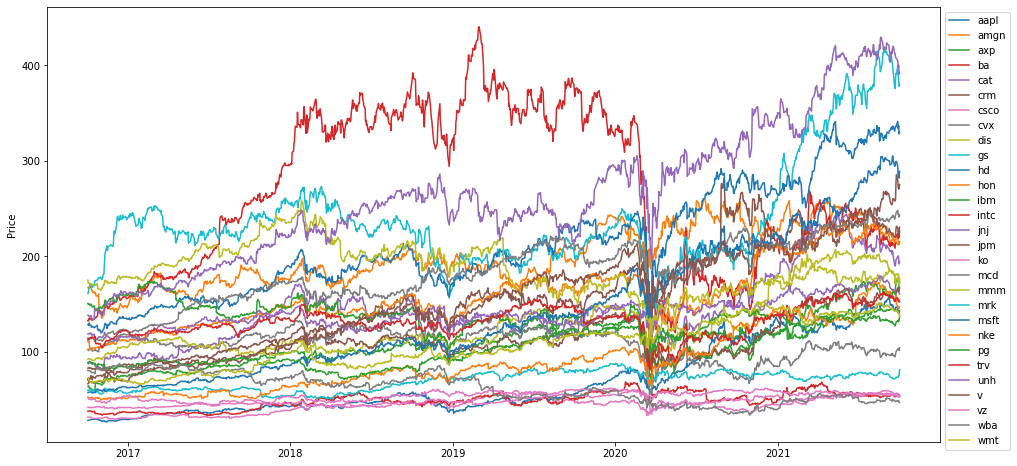

In [3]:
# Visualization
symbols = list(df.columns[1:])
plt.figure(figsize=(16,8))
for company in symbols:
    plt.plot(df.Date, df[company], label=company)
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel("Price")
plt.show()

In [7]:
companies = [
    'aapl', 'amgn', 'axp', 'ba', 'cat', 'crm', 'csco', 'cvx', 'dis',
    'gs', 'hd', 'hon', 'ibm', 'intc', 'jnj', 'jpm', 'ko', 'mcd', 'mmm',
    'mrk', 'msft', 'nke', 'pg', 'trv', 'unh', 'v', 'vz', 'wba', 'wmt'
]
bs = baseline.baseline(df, companies, "Week")
bs.train()

  0%|          | 0/50 [00:00<?, ?it/s]

0 Training Loss: 0.7790158273099543 Validation Loss: 0.8097256166594369
10 Training Loss: 0.7487136613536667 Validation Loss: 0.6924140008077735
20 Training Loss: 0.8084119908757262 Validation Loss: 0.6755610904878094
30 Training Loss: 0.6905420199855343 Validation Loss: 0.6757663066188494
40 Training Loss: 0.6828285603077857 Validation Loss: 0.6862071694007942
49 Training Loss: 0.7845920520824391 Validation Loss: 0.6774521313962483
